In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv(r'C:\Users\HP\Desktop\kovai_co\Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20241128.csv')

In [48]:
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


In [49]:
df.shape

(1918, 7)

In [50]:
df.describe()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1898.000000
mean,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,43.390411
std,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.746882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000
50%,11417.000000,7507.000000,193.000000,13106.500000,567.500000,40.000000
75%,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,68.000000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000


In [51]:
df.dtypes['Date']

dtype('O')

In [52]:
df.info

<bound method DataFrame.info of             Date  Local Route  Light Rail  Peak Service  Rapid Route  School  \
0     30/08/2024        16436       10705           225        19026    3925   
1     15/09/2023        15499       10671           267        18421    4519   
2     28/12/2021         1756        2352             0         3775       0   
3     11/01/2023        10536        8347           223        14072       0   
4     11/09/2021          820         612             0         1283       0   
...          ...          ...         ...           ...          ...     ...   
1913  19/01/2023        11337        8671           262        14881       0   
1914  16/08/2023        16791       11800           387        20936    4684   
1915  10/01/2022         5732        3548            73         6644       0   
1916  04/05/2020         3717        1952            70         4411     131   
1917  26/07/2023        16680       11726           347        20438    4738   

      O

CHECKING DATA TYPE OF THE FEATURES

In [53]:
df.dtypes

Date             object
Local Route       int64
Light Rail        int64
Peak Service      int64
Rapid Route       int64
School            int64
Other           float64
dtype: object

CONVERTING THE DATA TYPE OF DATE COLUMN

In [54]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\HP\AppData\Local\Temp\ipykernel_13512\2394721818.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [55]:
df.dtypes

Date            datetime64[ns]
Local Route              int64
Light Rail               int64
Peak Service             int64
Rapid Route              int64
School                   int64
Other                  float64
dtype: object

In [66]:
df_new = df.sort_values(by='Date', axis=0)

In [67]:
df_new.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
1013,2019-07-01,15987,9962,407,21223,3715,NaN
1120,2019-07-02,16895,10656,409,21715,3993,NaN
1451,2019-07-03,16613,10658,427,22025,3638,NaN
1171,2019-07-04,16604,10445,437,21868,3576,NaN
1523,2019-07-05,16040,10532,400,20697,2856,NaN


In [68]:
df_new.isnull().any()

Date            False
Local Route     False
Light Rail      False
Peak Service    False
Rapid Route     False
School          False
Other            True
dtype: bool

In [71]:
df_new.replace(to_replace=0, method='ffill', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13512\4065366540.py:1: FutureWarning: The 'method' keyword in DataFrame.replace is deprecated and will be removed in a future version.
  df_new.replace(to_replace=0, method='ffill', inplace=True)


In [72]:
df_new

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
1013,2019-07-01,15987,9962,407,21223,3715,20
1120,2019-07-02,16895,10656,409,21715,3993,20
1451,2019-07-03,16613,10658,427,22025,3638,20
1171,2019-07-04,16604,10445,437,21868,3576,20
1523,2019-07-05,16040,10532,400,20697,2856,20
...,...,...,...,...,...,...,...
1662,2024-09-25,21,78,1,10,8,20
1330,2024-09-26,9,78,1,10,2,20
1731,2024-09-27,6,78,1,13,2,20
1652,2024-09-28,1,78,1,4,2,20


In [73]:
df_norm = (df_new-df_new.min())/(df_new.max()-df_new.min())
df_norm

C:\Users\HP\AppData\Local\Temp\ipykernel_13512\2710987295.py:1: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  df_norm = (df_new-df_new.min())/(df_new.max()-df_new.min())


,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
1013,0.0,0.758745,0.655612,0.394942,0.740017,0.511993,NaN
1120,0.000522,0.801842,0.701645,0.396887,0.757175,0.550317,NaN
1451,0.001043,0.788457,0.701778,0.414397,0.767986,0.501379,NaN
1171,0.001565,0.78803,0.687649,0.424125,0.762511,0.492832,NaN
1523,0.002087,0.761261,0.69342,0.388132,0.721674,0.393576,NaN
...,...,...,...,...,...,...,...
1662,0.997913,0.000949,0.0,0.0,0.000244,0.000965,NaN
1330,0.998435,0.00038,0.0,0.0,0.000244,0.000138,NaN
1731,0.998957,0.000237,0.0,0.0,0.000349,0.000138,NaN
1652,0.999478,0.0,0.0,0.0,0.000035,0.000138,NaN


In [79]:
df_norm.drop('Other', axis=1, inplace=True)

In [80]:
df_norm.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School
1013,0.0,0.758745,0.655612,0.394942,0.740017,0.511993
1120,0.000522,0.801842,0.701645,0.396887,0.757175,0.550317
1451,0.001043,0.788457,0.701778,0.414397,0.767986,0.501379
1171,0.001565,0.78803,0.687649,0.424125,0.762511,0.492832
1523,0.002087,0.761261,0.69342,0.388132,0.721674,0.393576


In [81]:
df_norm.isnull().sum()

Date            0
Local Route     0
Light Rail      0
Peak Service    0
Rapid Route     0
School          0
dtype: int64

EDA

Univariate

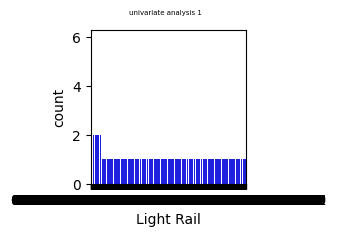

In [89]:
fig= plt.subplots(1,1, figsize=(2,2))
plt.suptitle("univariate analysis 1", size=(5))

sns.countplot (x='Light Rail', data=df_norm, color='blue', order=df_norm['Light Rail'].value_counts().index)
plt.show()


Bivariate

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


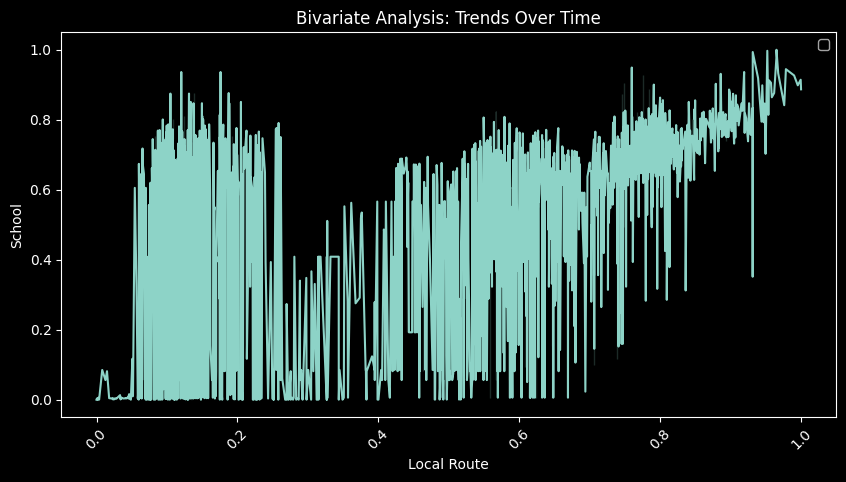

In [111]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Local Route', y='School', data=df_norm)
plt.title('Bivariate Analysis: Trends Over Time')
plt.xlabel('Local Route')
plt.ylabel('School')
plt.legend()
plt.xticks(rotation=45)
plt.show()


INSIGHTS:

1. When the range of Local Route is 1.0, the School also has the same range of traffic
2. When the range in Local Route between 0.0 and 0.2, the range of School is between 0.6 to 1.0 which says that at this point the traffic is huge in the School Route

Multivariate

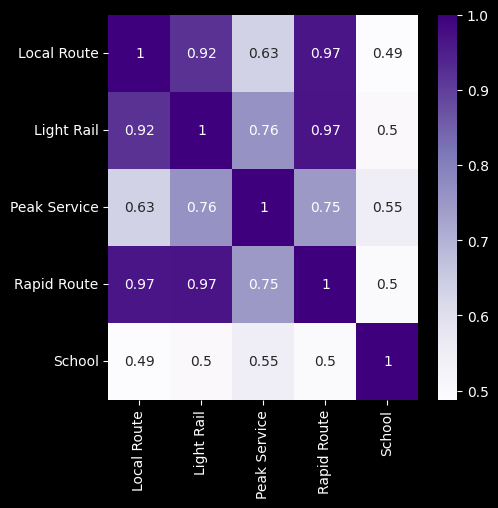

In [102]:
plt.figure(figsize=(5,5))
c_matrix = df_norm.drop(columns='Date').corr()
sns.heatmap(c_matrix, annot=True, cmap='Purples')
plt.show()

INSIGHTS:

1. Light Rail is correlated with Rapid Route by 97%
2. Local Route is correlated with Rapid Route by 97%
3. Light Rail and Local Route are less correlated with School by 5%

MODEL BUILDING

In [112]:
import keras
import tensorflow as tf

In [113]:
split_percent = 0.80
split = int(split_percent*100)

In [114]:
X_train = df_norm['Date'][:split]
X_test = df_norm['Date'][split:]

y_train = df_norm['School'][:split]
y_test = df_norm['School'][split:]



In [ ]:
print(len(X_train))


80


In [119]:
print(len(y_train))

80


In [141]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam


In [142]:
data_using = df_norm

In [148]:

data_using['Date'] = pd.to_datetime(data_using['Date'])
data_using.set_index('Date', inplace=True)
features = data_using['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']
X=[]
y=[]
X.append(data_using['Date'])
y.append(features)  
    




KeyError: 'Date'